In [11]:
# Name: Björn Bauer
# Matr.: 9973491

# Aufgabe: - •Task:  load file, show who gets the Nobel Price? Gender? Age? Plot the Age, Find the Yangest and the Oldest. Plot Winners with more then 1 Nobel Price
#

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# import sklearn.datasets
import numpy as np
import pandas as pd


# Set default Seaborn style
sns.set()

# csv einlesen, Seperator nicht notwendig
nobel=pd.read_csv("archive.csv")


In [13]:
# Tabelle anzeigen um Überblick zu erhalten
nobel

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN
965,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN
966,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN
967,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN


In [14]:
# check if data missing
missing = nobel.isnull().sum()
missing

Year                      0
Category                  0
Prize                     0
Motivation               88
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date               29
Birth City               28
Birth Country            26
Sex                      26
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
dtype: int64

In [15]:
# Die einzigen Daten die in Bezug auf die Aufgabe beachtet werden müssen befinden sich in Spalte "Sex"

df = pd.DataFrame(nobel)
# 2016 ist das letzte Jahr in der CSV, hier wird das neuste Jahr gezeigt
df_mask=df['Year']==pd.DataFrame.max(nobel).Year

filtered_df = df[df_mask]
print(filtered_df)

     Year    Category                                              Prize  \
958  2016   Chemistry                  The Nobel Prize in Chemistry 2016   
959  2016   Chemistry                  The Nobel Prize in Chemistry 2016   
960  2016   Chemistry                  The Nobel Prize in Chemistry 2016   
961  2016   Economics  The Sveriges Riksbank Prize in Economic Scienc...   
962  2016   Economics  The Sveriges Riksbank Prize in Economic Scienc...   
963  2016  Literature                 The Nobel Prize in Literature 2016   
964  2016    Medicine     The Nobel Prize in Physiology or Medicine 2016   
965  2016       Peace                         The Nobel Peace Prize 2016   
966  2016     Physics                    The Nobel Prize in Physics 2016   
967  2016     Physics                    The Nobel Prize in Physics 2016   
968  2016     Physics                    The Nobel Prize in Physics 2016   

                                            Motivation Prize Share  \
958  "for the des

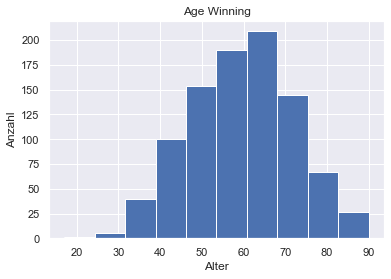

In [16]:
#mit Unterstützung von Lukas Gößl, hilfe betrifft errors='coerce'

from datetime import datetime, date 

df['Age Winning'] = (pd.to_datetime(df['Year'], format='%Y').dt.year - pd.to_datetime(df['Birth Date'], errors='coerce').dt.year)


# Erstelle den Plot
_ = plt.hist(df['Age Winning'])


plt.title('Age Winning')
plt.xlabel('Alter')
plt.ylabel('Anzahl')

# Zeige Plot an
plt.show()

In [17]:
# Ausgabe der gekürzten Tabelle

derived_df = df[['Full Name', 'Sex', 'Age Winning']]
print(derived_df)

                        Full Name   Sex  Age Winning
0    Jacobus Henricus van 't Hoff  Male         49.0
1                 Sully Prudhomme  Male         62.0
2          Emil Adolf von Behring  Male         47.0
3               Jean Henry Dunant  Male         73.0
4                  Frédéric Passy  Male         79.0
..                            ...   ...          ...
964              Yoshinori Ohsumi  Male         71.0
965            Juan Manuel Santos  Male         65.0
966             David J. Thouless  Male         82.0
967          F. Duncan M. Haldane  Male         65.0
968         J. Michael Kosterlitz  Male         73.0

[969 rows x 3 columns]


In [18]:
# Der jüngste Gewinner
df_mask=derived_df['Age Winning'].min()

derived_df[derived_df.isin([df_mask]).any(axis=1)]


,Full Name,Sex,Age Winning
940,Malala Yousafzai,Female,17.0


In [45]:
# Der älteste Gewinner

df_mask=derived_df['Age Winning'].max()

derived_df[derived_df.isin([df_mask]).any(axis=1)]

AttributeError: 'float' object has no attribute 'type'

In [20]:
# display multiple winners
df = pd.DataFrame(nobel)

# Eliminiere die Doppelten einträge und Ermittle die Dopellten Einträge
multipleWinner = df[df.duplicated(['Full Name'], keep=False)]
table =multipleWinner.pivot_table(index = ['Full Name'], aggfunc ='size')
table

Full Name
Abdus Salam                         2
Adam G. Riess                       2
Adolf Friedrich Johann Butenandt    2
Albert Fert                         2
Alvin E. Roth                       2
                                   ..
Tomas Lindahl                       2
Toshihide Maskawa                   2
Walther Bothe                       2
Werner Forssmann                    2
William Parry Murphy                2
Length: 63, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

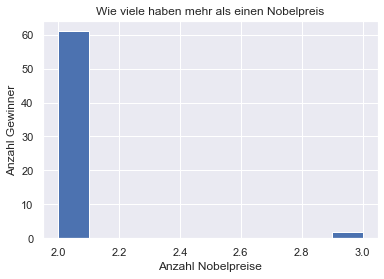

In [21]:
# display multiple winners
df = pd.DataFrame(nobel)

# Eliminiere die Doppelten einträge und Ermittle die Dopellten Einträge
multipleWinner = df[df.duplicated(['Full Name'], keep=False)]
table =multipleWinner.pivot_table(index = ['Full Name'], aggfunc ='size')

# Labeln
plt.title('Wie viele haben mehr als einen Nobelpreis')
plt.xlabel('Anzahl Nobelpreise')
plt.ylabel('Anzahl Gewinner')

#Plotte alle die mehr als einen Nobelpreis gewonnen haben
plt.hist(table)
plt.show

In [22]:
# AUfgabenstellung Aufgabe2
# Wahrscheinlichkeit für den jüngsten Nobelpreisgewinner
# Statistische Characteristika für alter (Min Standardabweichung. ecdf etc.)
# Pluspunkt: Covarianzmatrix für die zweiten anderen Iristypen (warum 0.1 und 1.0 Kovarianz und 1.1 und 0.0 Standardabweichung)

In [23]:
# Min und Max des Alters wurden im ersten Teil bereits berrechnet

In [27]:
# Mean und Median
import statistics

mean_age = np.mean(derived_df['Age Winning'])
print(mean_age)

# Mittelwert oder Duruchscnitt bezeichnet das Zusammengezählte Alter aller Gewinner geteilt durch die Anzahl der Gewinner

median_age = statistics.median(derived_df['Age Winning'])
print(median_age)

# Median ist der Wert in der Mitte

62.0

In [ ]:
# Covarianz ist auf Alter nicht Möglich

In [54]:
#Percentile
# Erklärung
#Unter einer Perzentile versteht man eine statistische Größe, die die Position eines Wertes,
# mit anderen Werten eines Kollektivs vergleicht. 
# So besagt z.B. die 95. Perzentile, dass 95 von 100 Daten unterhalb dieses bestimmten Wertes liegen.

percentiles_025 = derived_df['Age Winning'].quantile(0.025)
print(percentiles_025 )
percentiles_25 = derived_df['Age Winning'].quantile(0.25)
print(percentiles_25)
percentiles_50 = derived_df['Age Winning'].quantile(0.50)
print(percentiles_50)
percentiles_75 = derived_df['Age Winning'].quantile(0.75)
print(percentiles_75)
percentiles_975 = derived_df['Age Winning'].quantile(0.975)
print(percentiles_975)

36.0
50.0
60.0
69.0
83.0


In [37]:
#Varianz und Standardabweichung
varianz=np.var(derived_df['Age Winning'])
print(varianz)
#Erklärung Varianz
# Die Varianz ist ein Streuungsmaß, welches die Verteilung von Werten um den Mittelwert kennzeichnet.
standardabweichung=np.std(derived_df['Age Winning'])
print(standardabweichung)
# Erklärung Standardabweichung
#Die Standardabweichung ist ein Maß für die Streubreite der Werte eines Merkmals rund um dessen Mittelwert

153.03226026431966
12.370620852015458


In [43]:
#Poison Verteilung
from scipy.stats import poisson
youngestAge = df_mask=derived_df['Age Winning'].min()
ageMean = np.mean(derived_df['Age Winning'])
poisson.cdf(k=youngestAge, mu=ageMean)


8.365697170223821e-11

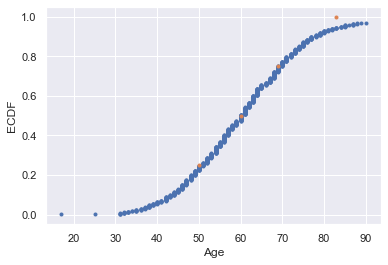

In [76]:
def ecdf(derived_df):
    # number of data points: n
    n = len(derived_df)
    # x-data for the ECDF: x
    x=np.sort(derived_df)
    # y-data for the ECDF: y
    y=np.arange(1, n+1)/n
    return x,y

precentiles = [percentiles_025, percentiles_25, percentiles_50,percentiles_75,percentiles_975]



# Zeichne Percentile
x,y = ecdf(percentiles)
# Zeichne ecdf Veteilung
x_vers, y_vers = ecdf(derived_df['Age Winning'])
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.plot(x, y, '.')
_ = plt.xlabel('Age')
_ = plt.ylabel('ECDF')

plt.show()

In [ ]:
#Poisson-Verteilung

# Draw 10,000 samples out of Poisson distribution: samples_poisson
prob_younger_than_18=poisson.cdf(k=17, mu=ageMean)
print('Wahrscheinlichkeit Alter unter 18: ', prob_younger_than_18)

amount_of_hits = 0

for i in range(10000000000000):
    rand_num = np.random.rand()
    if rand_num <= prob_younger_than_18:
        amount_of_hits+=1

print(amount_of_hits)

Wahrscheinlichkeit Alter unter 18:  8.365697170223821e-11
